# BaseBall Case Study

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

-- Output: Number of predicted wins (W)

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('baseball.csv')

In [4]:
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Identify the type of problem

### This problem is Linear Regression Problem

In [5]:
data.shape

(30, 17)

In [6]:
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

# EDA Process

In [7]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Mean-Std: As there is huge diffrence between mean and std , OUTLIERS would be present

Min- Max: As there is alot of diffrence between min-max one need to do is scaling of data.

In [8]:
#checking null values in dataset 
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in our dataset

# Data Cleaning Process

### Outliers

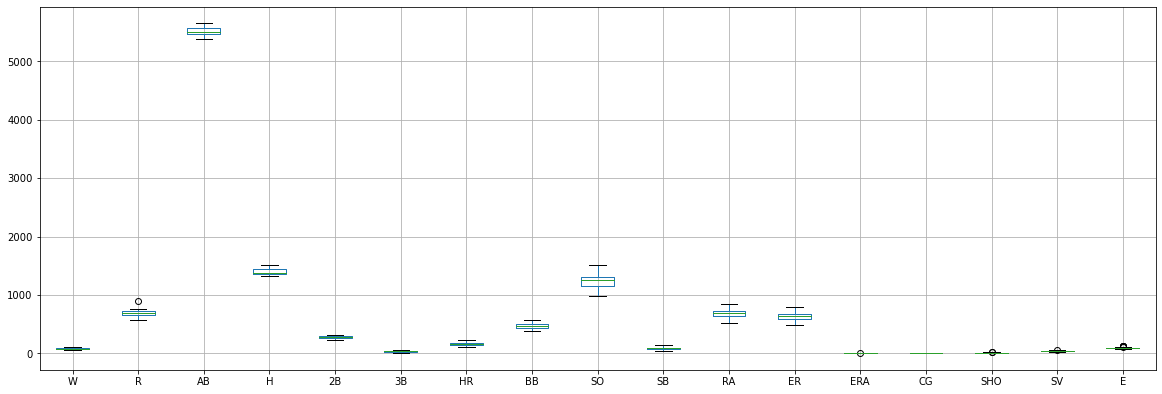

In [9]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [10]:
# Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [11]:
threshold = 3
print(np.where(z<3))

(array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11,
       11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13,
       13, 13, 13, 13, 1

In [12]:
#removing outliers
data_new = data[(z<3).all(axis=1)]

In [13]:
data.shape

(30, 17)

In [14]:
#After removing outliers
data_new.shape

(29, 17)

In [15]:
data=data_new
data.shape

(29, 17)

### Skewness

In [20]:
#sns.pairplot(data)
data.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [17]:
#from scipy.stats import skew
#skew(data)

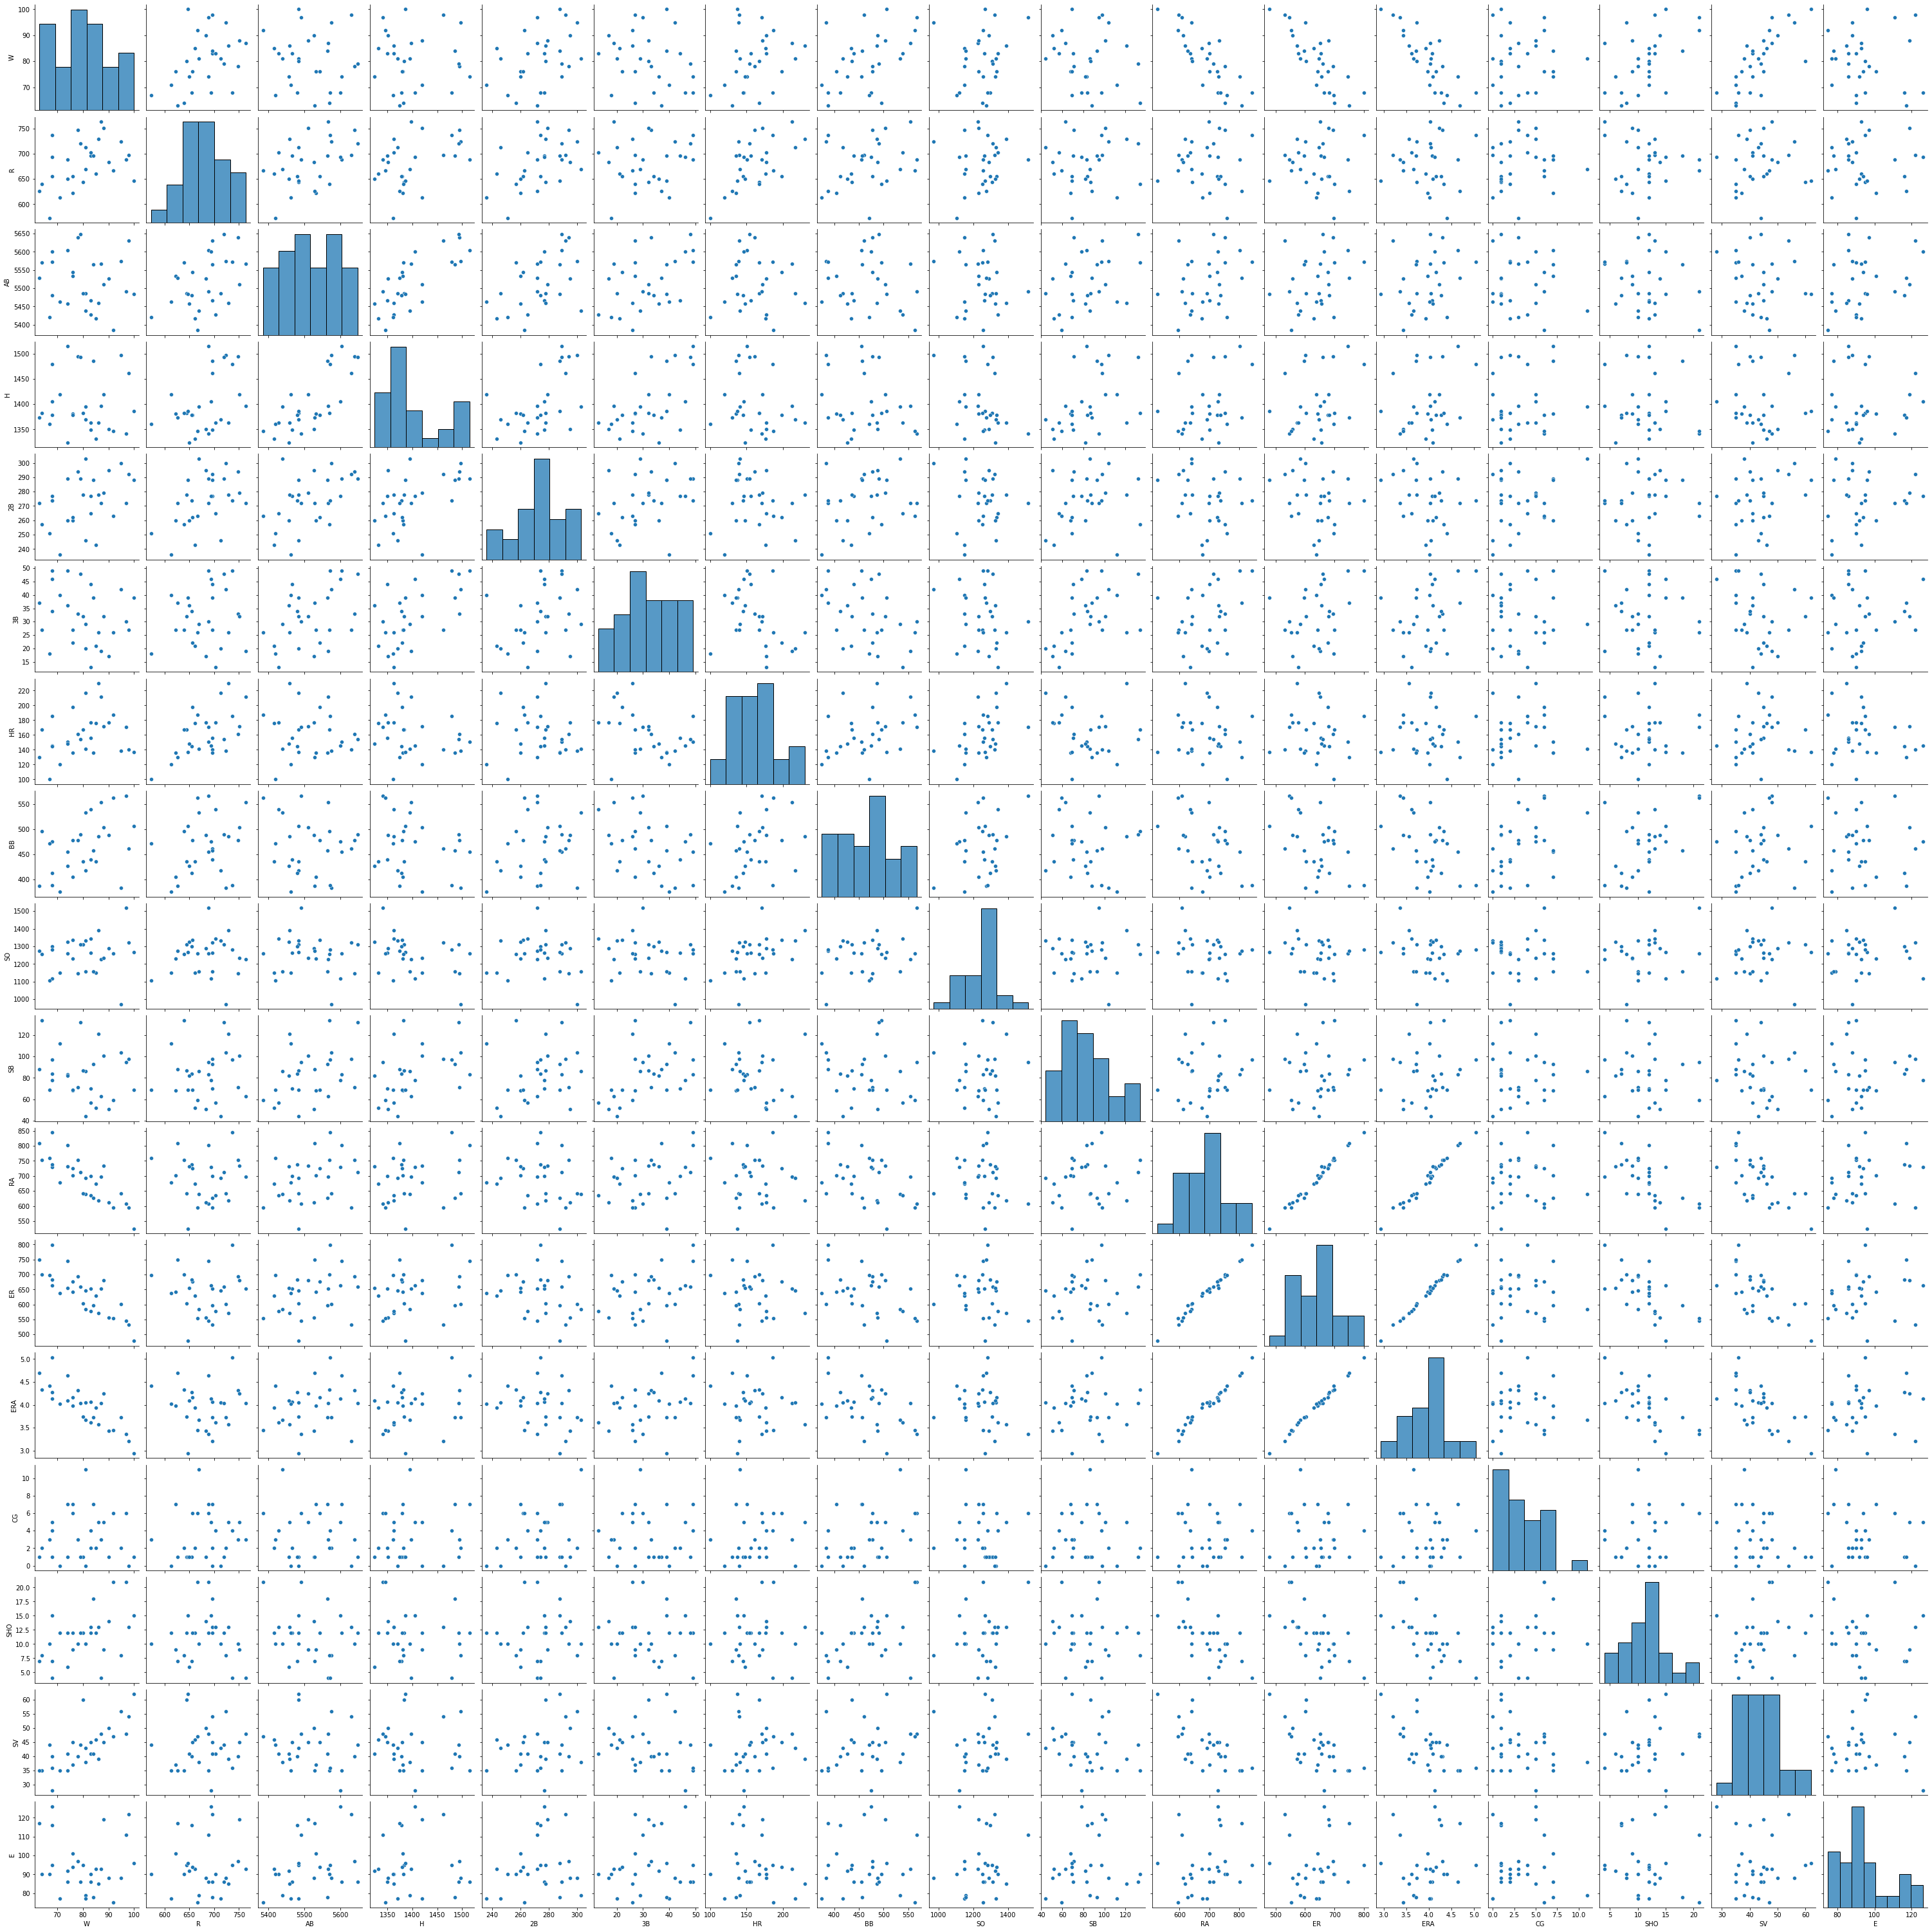

In [21]:
sns.pairplot(data)


There is Least skewness present


If skewness is less than -1 or greater than 1, the distribution is highly skewed.


If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.


If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

In [19]:
#to remove skewness, there are 2 methods: 1> log transform 2> square root transform using Method: boxcox

#data['W'] = np.log(data['W'])
#data['W'].plot.hist()
 # ---------------------------------
# from scipy.stats imports boxcox
# 0 -> Log transform
# 0.5 or .5 -> square root transform
# data['W'] = boxcox(data['W'],0)  # --> log transform



In [22]:
#Method for removing skew

from sklearn.preprocessing import power_transform
z = power_transform(data[0:])
data_new= pd.DataFrame(z,columns=data.columns)

In [23]:
data = data_new

### After removing skewness

In [24]:

data.skew()

W     -0.015560
R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

observation: AB(At Bats) and H (Homeruns) both became null after removing skewness.

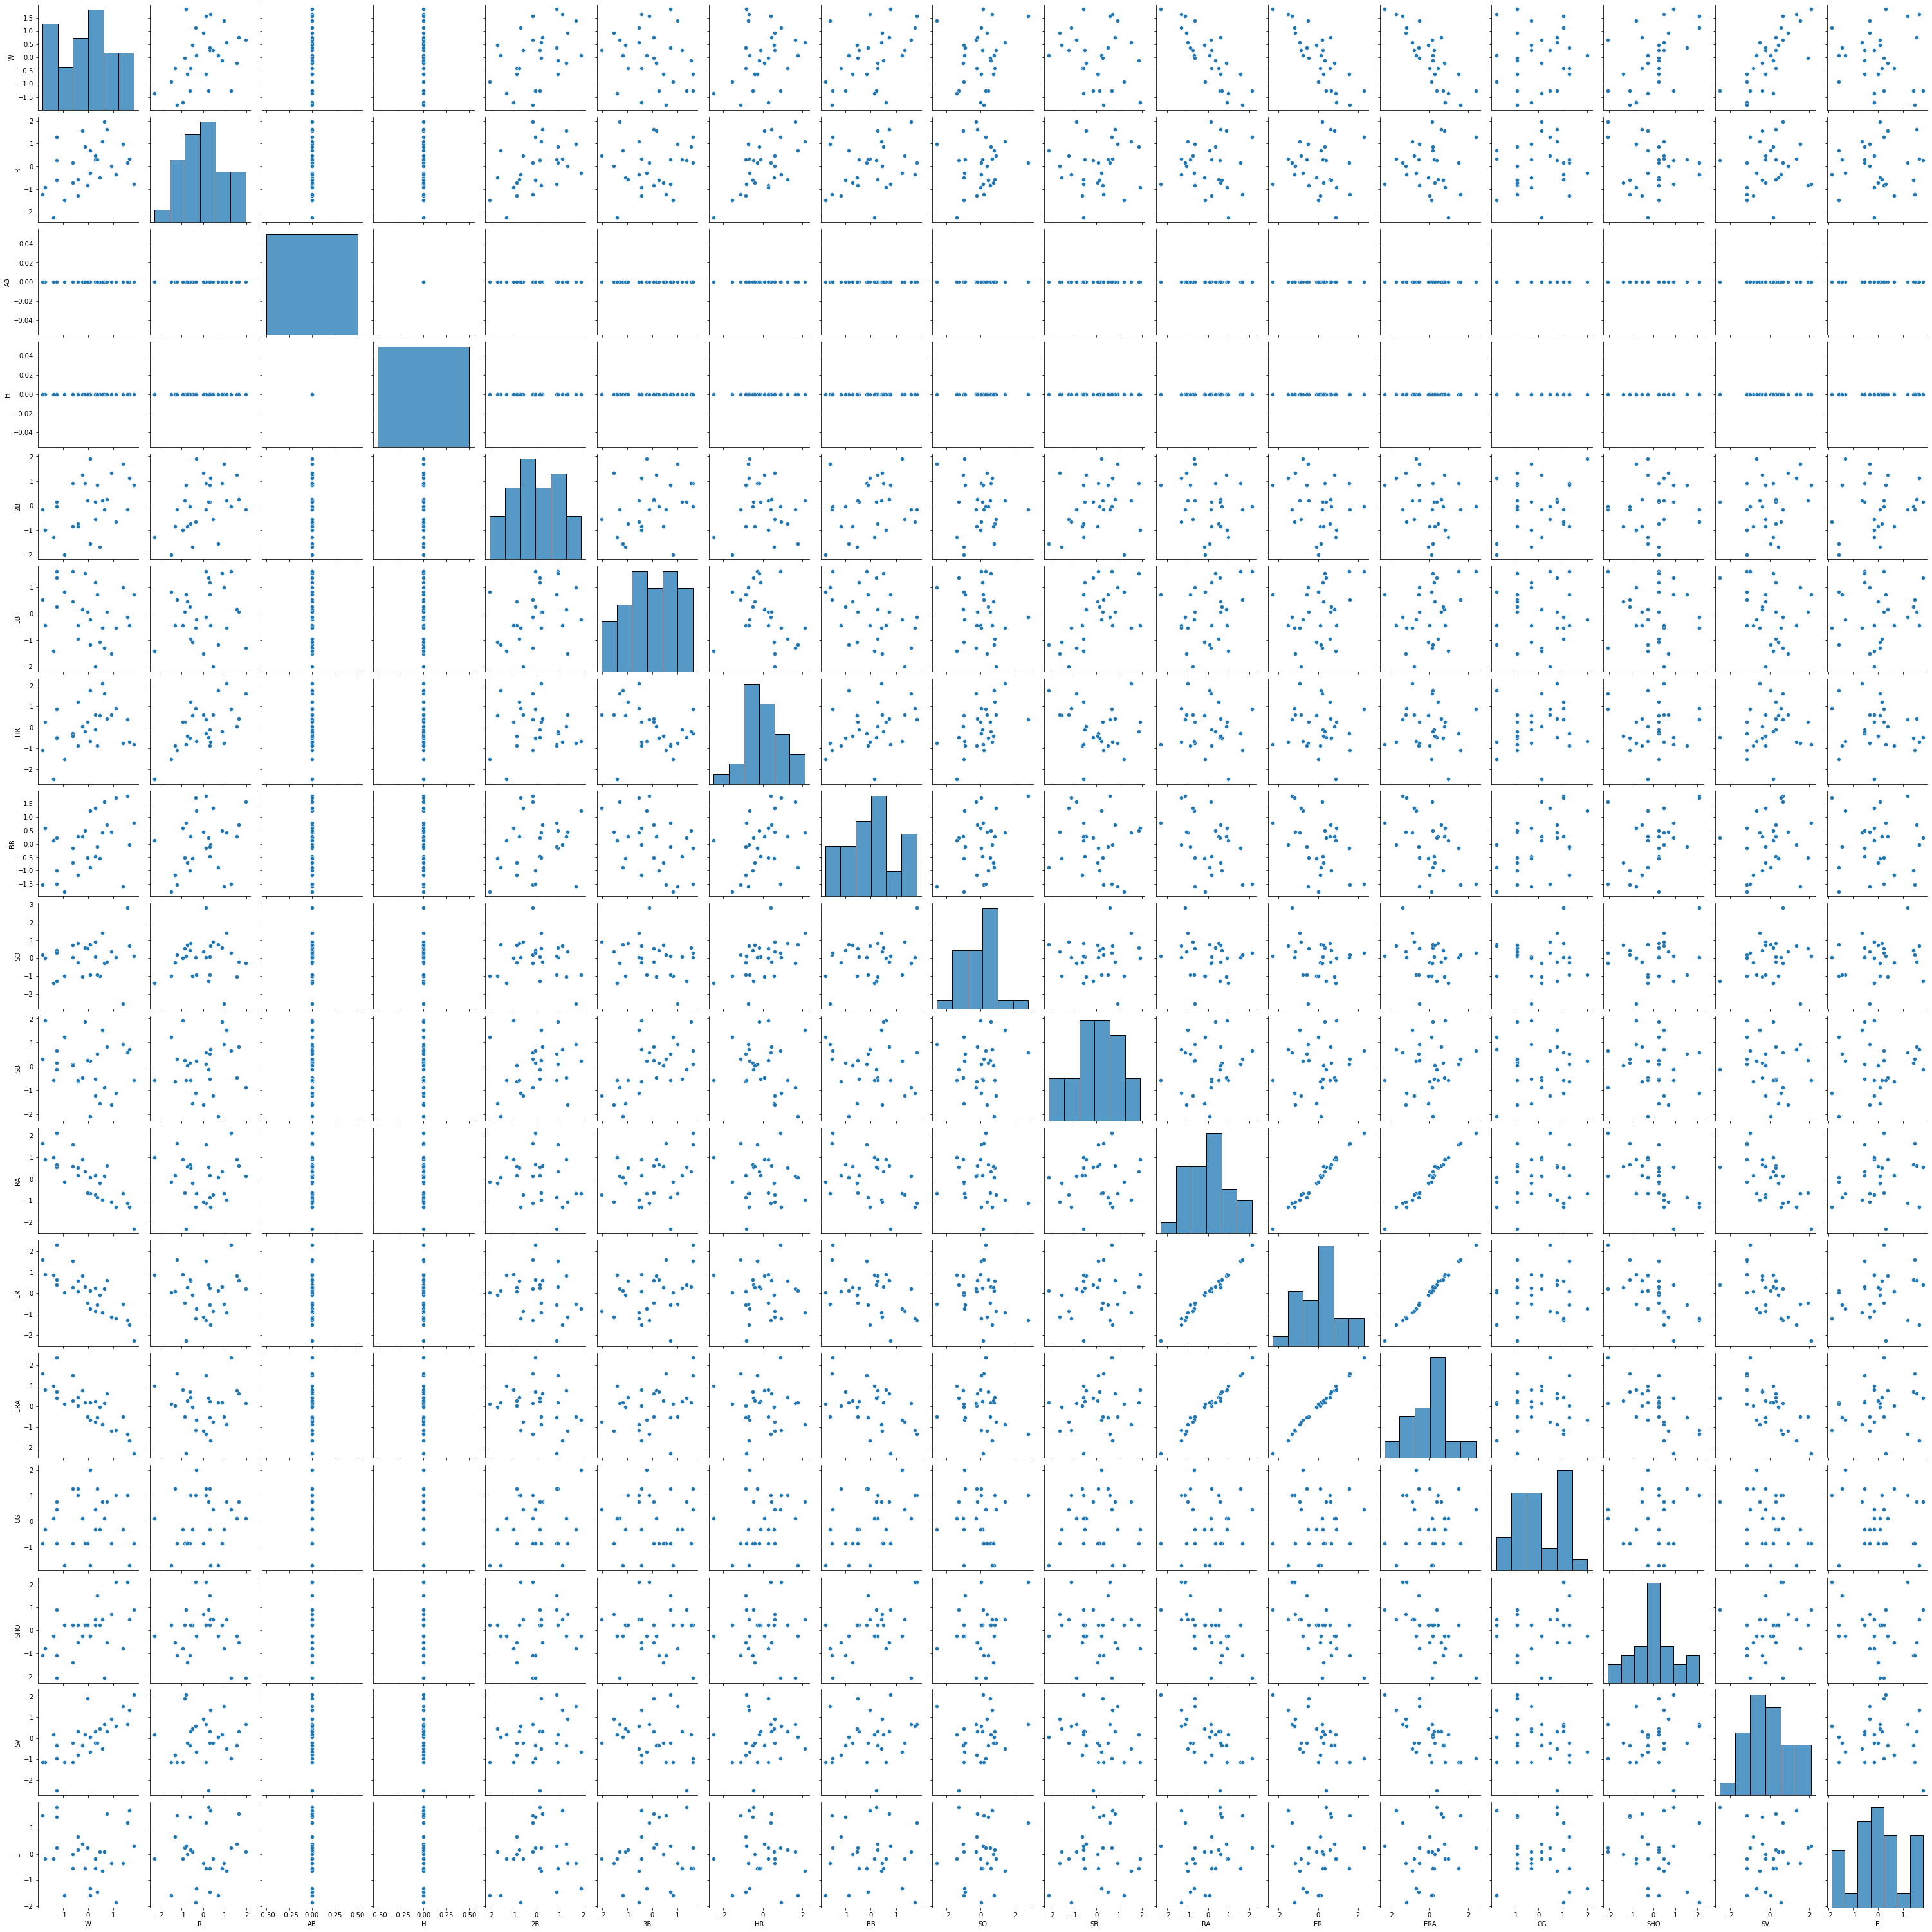

In [25]:
sns.pairplot(data)


#### Observed: As there were no such outliers and skewness present, so if we dont remove skewness and outliers then also works.

### Correlation

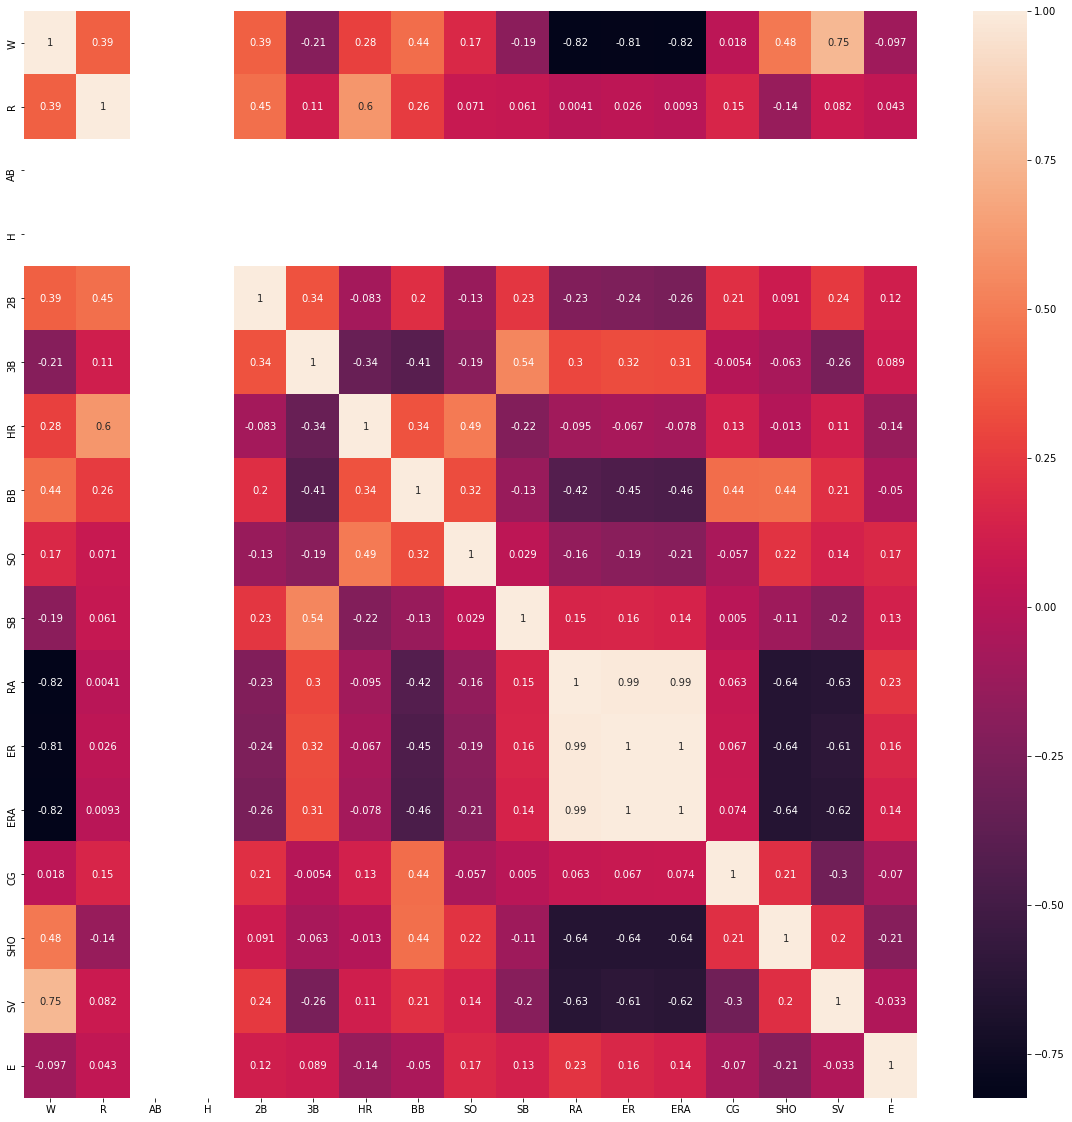

In [29]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix_hmap,annot=True)
plt.show()


Here we observed that mostly corelated with wins is Saves with 0.73 correlation

RA(Runs Allowed), ER(Earned Runs), ERA (Earned Run Average) are highly negatively corelated

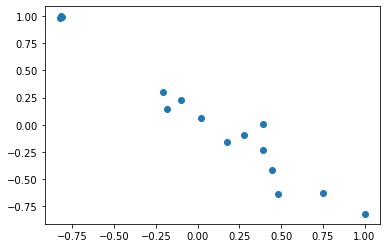

In [32]:
#RA
plt.scatter(corr_matrix_hmap['W'],corr_matrix_hmap['RA'])
plt.show()

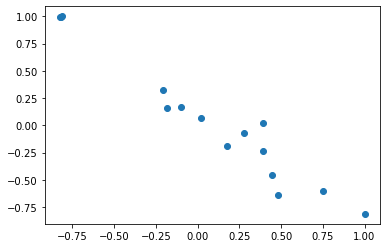

In [34]:
#ER
plt.scatter(corr_matrix_hmap['W'],corr_matrix_hmap['ER'])
plt.show()

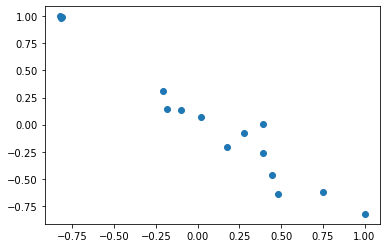

In [35]:
#ERA
plt.scatter(corr_matrix_hmap['W'],corr_matrix_hmap['ERA'])
plt.show()

In [36]:
#I one wants to remove 3 columns we can using following code: 
#drop the ERA 
#corr_matrix_hmap.drop('ERA',axis=1,inplace= True)

#to check
#corr_matrix_hmap.head()

In [37]:
corr_matrix_hmap["W"].sort_values(ascending=False)

W      1.000000
SV     0.753530
SHO    0.481318
BB     0.444101
2B     0.391281
R      0.390625
HR     0.275946
SO     0.173568
CG     0.018355
E     -0.097490
SB    -0.185760
3B    -0.205699
ER    -0.812619
RA    -0.821729
ERA   -0.823827
AB          NaN
H           NaN
Name: W, dtype: float64

In [38]:
data = corr_matrix_hmap

In [39]:
data["W"].sort_values(ascending=False)

W      1.000000
SV     0.753530
SHO    0.481318
BB     0.444101
2B     0.391281
R      0.390625
HR     0.275946
SO     0.173568
CG     0.018355
E     -0.097490
SB    -0.185760
3B    -0.205699
ER    -0.812619
RA    -0.821729
ERA   -0.823827
AB          NaN
H           NaN
Name: W, dtype: float64

In [59]:
#We are removing AB and H 
# Columns
#data.drop('AB',axis=1,inplace= True)
#data.drop('H',axis=1,inplace= True)

#Rows
data.drop('AB',axis=0,inplace= True)
data.drop('H',axis=0,inplace= True)
#to check
data.head()


,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390625,0.391281,-0.205699,0.275946,0.444101,0.173568,-0.185760,-0.821729,-0.812619,-0.823827,0.018355,0.481318,0.753530,-0.097490
R,0.390625,1.000000,0.445578,0.114928,0.601316,0.256226,0.071357,0.061189,0.004057,0.025590,0.009312,0.154121,-0.135749,0.081630,0.043300
2B,0.391281,0.445578,1.000000,0.339499,-0.082897,0.200778,-0.130878,0.234345,-0.232180,-0.239968,-0.261269,0.208298,0.091043,0.244839,0.115566
3B,-0.205699,0.114928,0.339499,1.000000,-0.336874,-0.407378,-0.192467,0.543289,0.299402,0.321161,0.313397,-0.005419,-0.063086,-0.261047,0.088634
HR,0.275946,0.601316,-0.082897,-0.336874,1.000000,0.342580,0.487945,-0.219285,-0.095334,-0.066766,-0.078316,0.125121,-0.012902,0.111649,-0.139022


AB and H are removed using above drop method from row as well as column.

# Feature Engineering

### There is no need for feature engineering process and creating new column

# Encoding

### As there is data only regarding numerical values, there is no need for Label Encoding nor for One Hot Encoder.

# Seperating Independent variable and Target Variable

In [60]:
# x= independent variable
x = data.iloc[:,1:]
x.head()

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,0.390625,0.391281,-0.205699,0.275946,0.444101,0.173568,-0.185760,-0.821729,-0.812619,-0.823827,0.018355,0.481318,0.753530,-0.097490
R,1.000000,0.445578,0.114928,0.601316,0.256226,0.071357,0.061189,0.004057,0.025590,0.009312,0.154121,-0.135749,0.081630,0.043300
2B,0.445578,1.000000,0.339499,-0.082897,0.200778,-0.130878,0.234345,-0.232180,-0.239968,-0.261269,0.208298,0.091043,0.244839,0.115566
3B,0.114928,0.339499,1.000000,-0.336874,-0.407378,-0.192467,0.543289,0.299402,0.321161,0.313397,-0.005419,-0.063086,-0.261047,0.088634
HR,0.601316,-0.082897,-0.336874,1.000000,0.342580,0.487945,-0.219285,-0.095334,-0.066766,-0.078316,0.125121,-0.012902,0.111649,-0.139022


In [61]:
#y = target variable , W(Wins) as column
y = data.iloc[:,0]
y.head()

W     1.000000
R     0.390625
2B    0.391281
3B   -0.205699
HR    0.275946
Name: W, dtype: float64

In [62]:
x.shape

(15, 14)

In [63]:
y.shape

(15,)

# Scaling

We dont need is scaling of data as we observe that there is no such diffrence in range of values.

In [64]:
data.describe()

,W,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.065440,0.208232,0.154936,0.103223,0.127544,0.115247,0.110933,0.106974,0.048497,0.047666,0.037502,0.128736,0.012671,0.005827,0.098515
std,0.563494,0.292950,0.330669,0.377361,0.357062,0.426199,0.321511,0.318134,0.587702,0.588227,0.591435,0.291303,0.453106,0.469891,0.280415
min,-0.823827,-0.135749,-0.261269,-0.407378,-0.336874,-0.463834,-0.209969,-0.219285,-0.821729,-0.812619,-0.823827,-0.302413,-0.642785,-0.626823,-0.206739
25%,-0.195730,0.034445,-0.106887,-0.199083,-0.089115,-0.269807,-0.143018,-0.119741,-0.326784,-0.346461,-0.362552,-0.000204,-0.171244,-0.281730,-0.060323
50%,0.173568,0.081630,0.200778,0.088634,-0.012902,0.208390,0.071357,0.061189,0.004057,0.025590,0.009312,0.067212,-0.012902,0.081630,0.088634
75%,0.417691,0.323425,0.292169,0.317279,0.309263,0.392826,0.195147,0.153691,0.264632,0.242821,0.227560,0.181209,0.212620,0.202531,0.151144
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


As the no such diffrence between min and max one dont need to scale the data.As data is already between -1 to 1.And scaling can be done to independent variable only not to dependent variable.

# PCA

No need for PCA as there are no such huge data presnt in the dataset in 1000s of values.

# Train - Test Split

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)

In [67]:
x_train.shape

(10, 14)

In [68]:
y_train.shape

(10,)

In [69]:
x_test.shape

(5, 14)

In [70]:
y_test.shape

(5,)

Training data: taken 10 data as training

Testing data: taken 5 data as testing

### Model = LinearRegression

In [71]:
lm = LinearRegression()

In [72]:
lm.fit(x_train,y_train)

LinearRegression()

In [74]:
lm.coef_

array([ 0.43499229,  0.02020365,  0.04048301, -0.03439226,  0.02031251,
        0.0114519 , -0.08195487, -0.22605028, -0.18086666, -0.15017643,
       -0.04517776,  0.16070765,  0.22263341,  0.04471928])

In [75]:
lm.intercept_

-0.022735976048017664

In [76]:
data.columns

Index(['W', 'R', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG',
       'SHO', 'SV', 'E'],
      dtype='object')

In [78]:
lm.score(x_train,y_train)

1.0

#### Prediction

In [79]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Wins",pred)
print("Actual Wins",y_test)

Predicted Wins [-0.81352751 -0.06765715  0.8598736   0.63611146  0.44172702]
Actual Wins ER   -0.812619
CG    0.018355
W     1.000000
SV    0.753530
BB    0.444101
Name: W, dtype: float64


#### Errors

Mean Errors:

In [83]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Mean Absolute Error:',mean_absolute_error(y_test,pred))

print('Mean Squared Error:',mean_squared_error(y_test,pred))

print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


Mean Absolute Error 0.06936800655110928
Mean Squared Error 0.008165433030650055
Root Mean Squared Error 0.09036278565122954


r2 Score Error:

In [86]:
#coefficient of determination
#change in y whenever x i being changed
from sklearn.metrics import r2_score
print('r2 Score:',r2_score(y_test,pred))

r2 Score: 0.979906228257912


Here we observed that with the change in X, =.97%  y is changed (variation is coming)

### Predict the wins by providing the values

In [87]:
t = np.array([0.01,0.02,0.03,0.04,0.5,0.06,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.14])

In [88]:
t.shape

(14,)

Here we need to Reshape, because whatever values we ave given are considered as 14 number of rows, but it must be 1 row and 14 columns, i.e 1 row filled with values in each column.

In [89]:
#reshape(1,-1 ) means, 1 = 1 row and -1 = multiple comuns
t = t.reshape(1,-1)
t.shape

(1, 14)

In [90]:
lm.predict(t)

array([-0.01289791])

Observation:This Prediction shows that, If the above 14 values are given as input then, -0.012 will be the number of Wins

# Find Best Random State

In [100]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    mse = r2_score(y_test,predrf)
    if mse > maxAccu:
        maxAccu = mse
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)
    
    
    

Best score is:  0.9940372110070157 on Random_state 178


In [109]:
#used to find out best random state
#for i in range(1,200):
#    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
#    LR = LinearRegression()
#    LR.fit(x_train,y_train)
#    pred_train = LR.predict(x_train)
#    pred_test =LR.predict(x_test) 
#    print(f"At random state {i},the training score is: {r2_score(y_train,pred_train)}")
#    print(f"At random state {i},the testing score is: {r2_score(y_test,pred_test)}")
    

# Train - Test Model based on new founded Random State

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 178)

In [102]:
LR = LinearRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)


In [104]:
print('r2 Score:',r2_score(y_test,predrf))

r2 Score: 0.9940372110070157


Oservation: We got accuracy of 99 score as Perfomance

In [120]:
pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = r2_score(y_train,pred_train)
Test_accuracy = r2_score(y_test,pred_test)
maxAccu=0
maxRS=0

from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
        
    
    
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")
    

At cross fold 2 cv score is 0.9653776101549236 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 3 cv score is 0.9540304758127321 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 4 cv score is -0.6413820032463697 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 5 cv score is 0.6198559921306691 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 6 cv score is -0.21525308814248 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 7 cv score is -0.6453688033003696 and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 8 cv score is nan and accuracy score training is 1.0 and accuracy for the testing is 0.7835837776471406


At cross fold 9 cv score is nan and accuracy score training is 1.0 an

In [ ]:
#checking cross validation
#from sklearn.model_selection import cross_val_score
#cvs = cross_val_score(LR,x,y,cv=5)
#print("Cross validation for Linear Regression:",cvs.mean())

#### Observation: As At Fold 5, the diffrence between cross validation score and accuracy is least, will choose fold 5

Text(0.5, 1.0, 'Linear Regression')

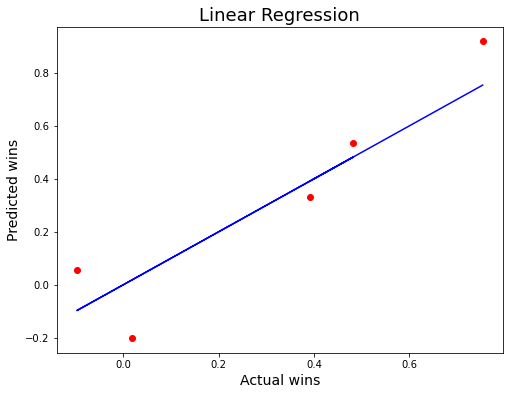

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y= pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual wins',fontsize=14)
plt.ylabel('Predicted wins',fontsize=14)
plt.title('Linear Regression',fontsize=18)

This graph shows the diffrence between actual wins and predicted wins, where blue is Best Fit Line

# Regularization 

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [125]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [127]:
#Lasso tries to ommit coefficient value (the value which dont affect y)
from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [130]:
ls = Lasso(alpha=0.001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.8742187946012997

In [141]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(ls,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.9683165705767948

# Ensemble  Technique

In [150]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
parameters = {'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

rf = RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'log2'}


In [155]:
rf=RandomForestRegressor(criterion="mae",max_features="log2")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = r2_score(y_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)



R2 Score: 78.09826209668407
Cross Validation Score: 40.86006306356541


# Saving Model

In [166]:
import pickle
filename = "BaseBall.pkl"
pickle.dump(rf,open(filename,"wb"))


# Conclusion

In [167]:
loaded_model=pickle.load(open('BaseBall.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7809826209668407


In [169]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4
Predicted,0.238492,0.433431,0.085811,-0.11366,0.478425
Original,0.238492,0.433431,0.085811,-0.11366,0.478425
